## Problem 1 - Linear Separability

### Answer 1.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

%matplotlib inline

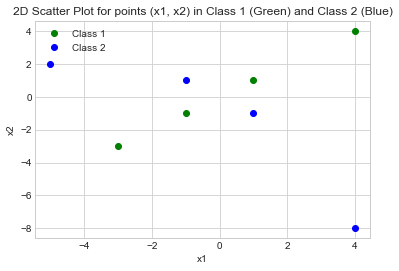

In [2]:
x_class_1 = np.array([-1, 1, -3, 4])
y_class_1 = np.array([-1, 1, -3, 4])

x_class_2 = np.array([-1, 1, -5, 4])
y_class_2 = np.array([1, -1, 2, -8])

plt.plot(x_class_1, y_class_1, 'o', color='green', label='Class 1')
ax = plt.gca()
ax.set(xlabel = 'x1', ylabel = 'x2')

plt.plot(x_class_2, y_class_2, 'o', color='blue', label='Class 2')
ax = plt.gca()
ax.set(xlabel = 'x1', ylabel = 'x2')

plt.title('2D Scatter Plot for points (x1, x2) in Class 1 (Green) and Class 2 (Blue)')
plt.legend()
plt.show()

Let the first set of points belongs to Class 1 and the other set belongs to Class 2.

Green points denote Class 1 while Blue Points denote Class 2. $x_1$ is the horizontal dimension while $x_2$ is the vertical one.

We can see from the plot above that the dataset $\text{IS NOT LINEARLY SEPARABLE}$ using any linear function/classifier, given only two features $ x_1$ and $x_2$ (without further transformation into a higher space). 


### Answer 1.2

Looking at the points from Class 1 and Class 2, we could see that:
1. $x_1$ and $x_2$ in Class 1 are of the same sign
2. $x_1$ and $x_2$ in Class 2 are of the opposite sign

Thus, we could propose some $z$ such as: $${z = x_1 * x_2}$$

This is linearly separable because Class 1 will all have positive values of $z$ while Class 2 will all have negative values of $z$.

### Answer 1.3

Suppose we have a 1D plane which plots $z$ for Class 1 and Class 2. Green lines denote Class 1 while Blue Points denote Class 2.

The separating hyperplane (or point, because this is 1D) is simply $z=c$, where $c$ is any constant satisfying $-1 < c < 1$. I pick $c=0$, which is denoted by the thick and short red line in the plot.

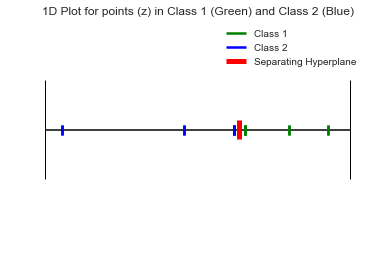

In [3]:
z_class_1 = np.multiply(x_class_1, y_class_1)
z_class_2 = np.multiply(x_class_2, y_class_2)

z_class_1 = np.repeat(z_class_1, 2)
z_class_2 = np.repeat(z_class_2, 2)

plt.figure()
plt.hlines(1, -35, 20)  

plt.eventplot(z_class_1, orientation='horizontal', colors='green', linelengths=0.1, linewidths=2.5, label='Class 1')
plt.eventplot(z_class_2, orientation='horizontal', colors='blue', linelengths=0.1, linewidths=2.5, label='Class 2')

plt.eventplot([-35, 20], orientation='horizontal', colors='black', linelengths=1, linewidths=1)
plt.eventplot([0], orientation='horizontal', colors='red', linelengths=0.2, linewidths=5, label='Separating Hyperplane')

plt.axis('off')

plt.title('1D Plot for points (z) in Class 1 (Green) and Class 2 (Blue)')
plt.legend()
plt.show()

### Answer for Problem 1.4

Because ...

## Problem 2 - Bias Variance Tradeoff, Regularization

### Answer 2.1

$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t(f(x_i) + \epsilon - g(x_i))^2] $$

Introduce terms $E[g(x_i]$ that will cancel each other:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i) + \epsilon - g(x_i) + E[g(x_i)] - E[g(x_i)])^2] $$

Using linearity in expectation:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[\epsilon^2] + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2] + \frac{2}{t} \sum_{i=1}^t E[\epsilon(f(x_i) - E[g(x_i)])] + \frac{2}{t} \sum_{i=1}^t E[\epsilon(E[g(x_i)] - g(x_i))] + \frac{2}{t} \sum_{i=1}^t E[((f(x_i) - E[g(x_i))(E[g(x_i)] - g(x_i))]] $$

Notice that $E[g(x_i)] = g(x_i)$, so that lefts us with:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[\epsilon^2] + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2]$$

Again, using linearity in expectation:
$$ E[MSE] = E[\frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2] + E[\frac{1}{t} \sum_{i=1}^t E[\epsilon^2]] + E[\frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2]$$

$$ E[MSE] = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[\epsilon^2] + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2$$

$$ E[MSE] = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2] + \frac{1}{t}(t) E[\epsilon^2]$$

$$ E[MSE] = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 + \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2] + E[\epsilon^2]$$

Finally:
$$ E[MSE] = Bias[g(x)]^2 + Var[g(x)] + Noise $$

where:
1. $$ Bias[g(x)]^2 = \frac{1}{t} \sum_{i=1}^t (f(x_i)-E[g(x_i)])^2 $$
2. $$ Var[g(x)] = \frac{1}{t} \sum_{i=1}^t E[(E[g(x_i)] - g(x_i))^2 $$
3. $$ Noise = E[\epsilon^2] $$

### Answer 2.2

The black line plot depicts $f(x)$ while the red dots (20 in total) are the samples drawn from $y(x)$. 

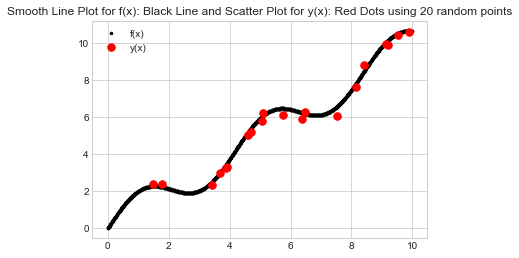

In [4]:
def f_x(x):
    return x + np.sin((3/2)*x)

x_smooth = np.arange(0, 10, 0.01)
f_x_plot_dots = f_x(x_smooth)

def generate_sample_from_y(x_rand, use_noise):
    y = f_x(x_rand)
    
    if use_noise:
        y = y + np.random.normal(0, 0.3, len(x_rand))
        
    return y
    
x_rand = np.random.uniform(0, 10, 20)
y_x_plot_dots = generate_sample_from_y(x_rand, True)


plt.plot(x_smooth, f_x_plot_dots, 'o', color='black', markersize=2.5, label='f(x)')
plt.plot(x_rand, y_x_plot_dots, 'o', color='red', markersize=7.5, label='y(x)')

plt.title('Smooth Line Plot for f(x): Black Line and Scatter Plot for y(x): Red Dots using 20 random points')
plt.legend()
plt.show()

### Answer 2.3

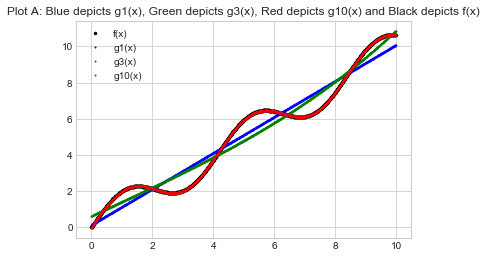

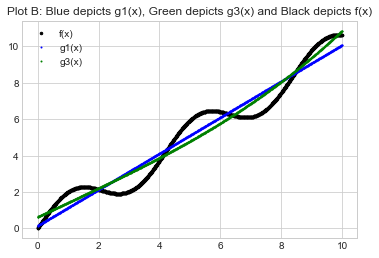

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

reshape_x_smooth = x_smooth.reshape(-1, 1)

g_1 = make_pipeline(PolynomialFeatures(1), LinearRegression())
g_1.fit(reshape_x_smooth, f_x(x_smooth).reshape(-1, 1))

g_3 = make_pipeline(PolynomialFeatures(3), LinearRegression())
g_3.fit(reshape_x_smooth, f_x(x_smooth).reshape(-1, 1))

g_10 = make_pipeline(PolynomialFeatures(10), LinearRegression())
g_10.fit(reshape_x_smooth, f_x(x_smooth).reshape(-1, 1))

plt.plot(x_smooth, f_x_plot_dots, 'o', color='black', markersize=2.5, label='f(x)')
plt.plot(x_smooth, g_1.predict(reshape_x_smooth), 'o', color='blue', markersize=1, label='g1(x)')
plt.plot(x_smooth, g_3.predict(reshape_x_smooth), 'o', color='green', markersize=1, label='g3(x)')
plt.plot(x_smooth, g_10.predict(reshape_x_smooth), 'o', color='red', markersize=1, label='g10(x)')

plt.title('Plot A: Blue depicts g1(x), Green depicts g3(x), Red depicts g10(x) and Black depicts f(x)')
plt.legend()
plt.show()

plt.plot(x_smooth, f_x_plot_dots, 'o', color='black', markersize=2.5, label='f(x)')
plt.plot(x_smooth, g_1.predict(reshape_x_smooth), 'o', color='blue', markersize=1, label='g1(x)')
plt.plot(x_smooth, g_3.predict(reshape_x_smooth), 'o', color='green', markersize=1, label='g3(x)')

plt.title('Plot B: Blue depicts g1(x), Green depicts g3(x) and Black depicts f(x)')
plt.legend()
plt.show()

In the first plot, Plot A, we can see that $g_1(x)$ (blue line) and $g_2(x)$ (green line) are underfitting while $g_{10}(x)$ (red line) is overfitting. $f(x)$, which is the black line, is fully overlayed by $g_{10}(x)$, the red line.

To make it clearer, I provide Plot B, in which I get ride of $g_{10}(x)$, i.e. the red line. We can compare that $g_{10}(x)$ resembles $f(x)$ quiet a lot, indicating overfitting.

### Answer 2.4

#### Function to Generate Datasets and to Simulate the Training

In [6]:
from numpy import polyfit, polyval
from sklearn.metrics import mean_squared_error

def generate_dataset(n_sample, x_low, x_high, n_dataset, test_frac, seed):
    np.random.seed(seed)
    
    x_rand = np.random.uniform(x_low, x_high, n_sample)
    
    slice_idx = int(test_frac * n_sample)
    
    x_train = x_rand[:slice_idx]
    x_test = x_rand[slice_idx:]
    
    # y without noise
    y_x_plot_dots = generate_sample_from_y(x_rand, False)
    y_train = y_x_plot_dots[:slice_idx]
    y_test = y_x_plot_dots[slice_idx:]

    # y with noise
    y_train_sets_noise = []
    y_test_sets_noise = []
    
    # Generate y_train and y_test
    for i in range(0, n_dataset):
        y_x_plot_dots_noise = generate_sample_from_y(x_rand, True)

        y_train_sets_noise.append(y_x_plot_dots_noise[:slice_idx])    
        y_test_sets_noise.append(y_x_plot_dots_noise[slice_idx:])
        
    return x_train.reshape(-1, 1), x_test.reshape(-1, 1), y_train, y_test, y_train_sets_noise, y_test_sets_noise

def compute_error(y_test, y_pred):
    y_test = y_test.flatten()
    y_pred = y_pred.flatten()
    
    assert y_test.shape == (10, )
    assert y_pred.shape == (10, )
    
    return mean_squared_error(y_pred, y_test)

def simulate(degree_low, degree_high, x_train, x_test, y_train_sets_noise, y_test_sets_noise):
    x_train = x_train.flatten() # polyfit needs 1D vector
    
    y_preds_train = [] # (15, 100, 40, 1) 
    y_preds_test = [] # (15, 100, 10, 1)
    test_err = [] # (15, 100, 10, 1)
    
    models = []
    
    for degree in range(degree_low - 1, degree_high):
        y_preds_train.append([])
        y_preds_test.append([])
        test_err.append([])
    
    for i in range(0, len(y_train_sets_noise)):
        y_train_noise = y_train_sets_noise[i].reshape(-1, 1)
        y_test_noise = y_test_sets_noise[i].reshape(-1, 1)

        for degree in range(degree_low - 1, degree_high):
            model = None
            # IMPORTANT: Increment the degree by 1 shere so it depicts the real degree
            # Funny story: I spend almost one hour debugging this offset bug
            model = polyfit(x_train, y_train_noise, degree + 1)
            models.append(model)
            
            y_pred_test = polyval(model, x_test)
            y_preds_test[degree].append(y_pred_test)

            # IMPORTANT: For error, use y WITH NOISE
            test_err[degree].append(compute_error(y_test_noise, y_pred_test))
            
    return models, np.array(y_preds_test), np.array(test_err)

#### Function to Compute Bias, Variance and Error

In [7]:
def compute_squared_bias(y_test, y_preds_test):
    # E[g(x)]
    avg_y_preds_test = y_preds_test.mean(axis=0)
    
    # Sanity check
    assert avg_y_preds_test.shape == (10, 1)
    
    # (E[g(x)] - f(x))**2
    # IMPORTANT: Use y WITHOUT NOISE
    # IMPORTANT: FLATTEN the average so it becomes (10, )
    return mean_squared_error(avg_y_preds_test.flatten(), y_test)

def compute_variance(y_preds_test):
    # IMPORTANT: Remove third dimension, (100, 10, 1) -> (100, 10)
    rows, cols = len(y_preds_test), len(y_preds_test[0])
    y_preds_test = y_preds_test.flatten().reshape(rows, cols)
    
    # E[g(x)]
    avg_y_preds_test = np.mean(y_preds_test, axis=0)
    # IMPORTANT: Tile to make duplicates, (10, ) -> (100, 10)
    avg_y_preds_test = np.tile(avg_y_preds_test, (100, 1))
    
    # (g(x) - E[g(x)])**2
    return mean_squared_error(y_preds_test, avg_y_preds_test)

#### Main Routine to Get the Stats for Each Polynomial Degree

In [8]:
x_train, x_test, y_train, y_test, y_train_sets_noise, y_test_sets_noise = generate_dataset(50, 0, 10, 100, 0.8, 82)

models, y_preds_test, test_err = simulate(1, 15, x_train, x_test, y_train_sets_noise, y_test_sets_noise)

# Sanity check
assert y_preds_test.shape == (15, 100, 10, 1)
assert test_err.shape == (15, 100)

avg_squared_biases = []
avg_test_errs = []
variances = []

for degree in range(0, 15):
    curr_y_pred_test = y_preds_test[degree]
    
    avg_squared_biases.append(compute_squared_bias(y_test, curr_y_pred_test))
    avg_test_errs.append(np.mean(test_err[degree]))
    variances.append(compute_variance(curr_y_pred_test))

#### Plot Testing Error, Bias and Variance against Model Complexity

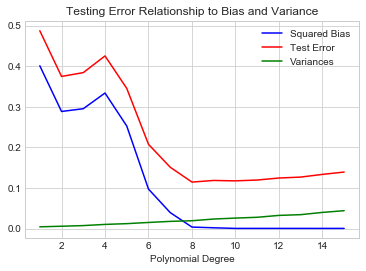

In [9]:
fig, ax = plt.subplots()

x_plots = np.arange(1, 16, 1)
y_plots = avg_squared_biases
ax.plot(x_plots, y_plots, color='blue', label='Squared Bias')

x_plots = np.arange(1, 16, 1)
y_plots = avg_test_errs
ax.plot(x_plots, y_plots, color='red', label='Test Error')

x_plots = np.arange(1, 16, 1)
y_plots = variances
ax.plot(x_plots, y_plots, color='green', label='Variances')

ax.set_xlabel('Polynomial Degree')         

ax.set_title('Testing Error Relationship to Bias and Variance')
ax.legend()
ax.grid(True)

plt.show()

#### Identifying the Best Model

In [10]:
best_performing_degree = np.argmin(avg_test_errs) + 1
best_performing_degree

8

The best performing model is the one with the lowest testing error, which is Polynomial Degree 8. We can also see that from the graph that this model seems to have a good balance between its bias and variance at Polynomial Degree 8.

### Answer 2.5

#### Ridge Regression is Used to Apply L2 Regularization 

In [11]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 10

# Polynomial Degree 10 model from 2.4
model_10 = models[degree - 1] 

# Ridge Regression, e.g. LinearRegression with L2 regularization
# Use alpha=1.0, meaning we optimize bias and norm equally
model_10_L2 = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))

y_preds_test_L2 = []
test_err_L2 = []

# Simulation Loop
for i in range(0, len(y_train_sets_noise)):
    y_train_noise = y_train_sets_noise[i].reshape(-1, 1)
    y_test_noise = y_test_sets_noise[i].reshape(-1, 1)

    model_10_L2.fit(x_train, y_train_noise)

    y_pred_test = model_10_L2.predict(x_test)
    y_preds_test_L2.append(y_pred_test)

    # IMPORTANT: For error, use y WITH NOISE
    test_err_L2.append(compute_error(y_test_noise, y_pred_test))
    
y_preds_test_L2 = np.array(y_preds_test_L2)
test_err_L2 = np.array(test_err_L2)

avg_squared_bias_L2 = compute_squared_bias(y_test, y_preds_test_L2)
avg_test_err_L2 = np.mean(test_err_L2)
variance_L2 = compute_variance(y_preds_test_L2)

print('Model without Regularization:')
print('Squared Bias: {}'.format(avg_squared_biases[degree-1]))
print('MSE: {}'.format(avg_test_errs[degree-1]))
print('Variance: {}'.format(variances[degree-1]))

print('-----------------------------')
print('-----------------------------')

print('Model with L2 Regularization:')
print('Squared Bias: {}'.format(avg_squared_bias_L2))
print('MSE: {}'.format(avg_test_err_L2))
print('Variance: {}'.format(variance_L2))

print('-----------------------------')
print('-----------------------------')

Model without Regularization:
Squared Bias: 0.00032542725998055356
MSE: 0.11739956779615142
Variance: 0.025728605869716047
-----------------------------
-----------------------------
Model with L2 Regularization:
Squared Bias: 0.06944578350660215
MSE: 0.1744139448742389
Variance: 0.01537534620983641
-----------------------------
-----------------------------


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.16592e-21): result may not be accurate.
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.16592e-21): result may not be accurate.
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.16592e-21): result may not be accurate.
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.16592e-21): result may not be accurate.
  overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py

#### Explanation for Bias and MSE Comparison

From the report above, we could see:
    
1. The regularized model have a significantly higher bias ($0.0694$ vs $0.0003$)
2. The regularized model also has a higher MSE ($0.1744$ vs $0.1174$)
3. However, the regularized model has a lower variance, although not significant ($0.0154$ vs $0.0257$)

The explanations are:
1. The regularized model has lower variance because it takes into account the solution norm, L2 to be specific, into its loss function. Its loss function is roughly: $||y - Xw||^2_2 + alpha * ||w||^2_2$ where it is an addition of bias (like normal linear regression) and the L2 norm of the solution $w$ to some extent of alpha. I use alpha equals 1 that means we optimize both terms equally. Thus, not only the regularized model minimizes the bias, but it tries to also minimize the L2 norm at the same time, resulting in a simpler model with lower variance.
2. The consequences of having to minimize both bias and L2 norms are that we might not get the solution with optimal (minimum) bias. Hence, with L2 regularization, we frequently have lower bias and MSE.

## Problem 3

### Answer 3.1

Two datasets picked:
    
1. energy-efficiency (https://www.openml.org/d/1472)
2. optdigits (https://www.openml.org/d/28)

In [12]:
import numpy as np
import pandas as pd

d1_path = 'data/energy-efficiency.csv'
d1_name = 'Energy Efficiency'

t_df = pd.read_csv(d1_path)
t_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,y1,y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,7,11
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,7,11
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,7,11
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,7,11
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,12,18


In [13]:
d2_path = 'data/optdigits.csv'
d2_name = 'Opt Digits'

i_df = pd.read_csv(d2_path)
i_df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,...,input56,input57,input58,input59,input60,input61,input62,input63,input64,class
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


#### Function to Summarize Attributes from a Dataset

In [14]:
def get_attribute_summary(df, class_column, dname):
    df_info = {}

    df_info['num_features'] = len(df.columns) - 1 # excluding label column
    df_info['num_instances'] = len(df)
    df_info['num_classes'] = len(np.unique(df[class_column]))

    df_info['num_numerical_features'] = 0
    df_info['num_categorical_features'] = 0
    
    df_info['categorical_indexes'] = []

    idx = 0
    for column in df:
        if column != class_column:
            if str(df[column].dtypes) == 'category':
                df_info['num_categorical_features'] = df_info['num_categorical_features'] + 1
                df_info['categorical_indexes'].append(idx)
            else:
                df_info['num_numerical_features'] = df_info['num_numerical_features'] + 1
            
            idx = idx + 1

    # Some sanity check
    assert df_info['num_numerical_features'] + df_info['num_categorical_features'] == df_info['num_features']

    print('Summary of {} dataset attributes: '.format(dname))
    print('Number of features: {}'.format(df_info['num_features']))
    print('Number of instances: {}'.format(df_info['num_instances']))
    print('Number of classes: {}'.format(df_info['num_classes']))
    print('Number of numerical features: {}'.format(df_info['num_numerical_features']))
    print('Number of categorical features: {}'.format(df_info['num_categorical_features']))
    
    return df_info

#### Attribute Summary for Dataset 1

In [15]:
d1_classname = 'y1'  

# Even though y2 contains integer, but it is stated as a nominal variable
# in the dataset explanation (see https://www.openml.org/d/1472)
# Thus, I add some string prefix so it will count as nominal
# t_df['y2'] = 'str' + t_df['y2'].astype(str)
t_df['y2'] = t_df['y2'].astype('category')

d1_info = get_attribute_summary(t_df, d1_classname, d1_name)

Summary of Energy Efficiency dataset attributes: 
Number of features: 9
Number of instances: 768
Number of classes: 37
Number of numerical features: 8
Number of categorical features: 1


#### Attribute Summary for Dataset 2

In [16]:
d2_classname = 'class'
d2_info = get_attribute_summary(i_df, d2_classname, d2_name)

Summary of Opt Digits dataset attributes: 
Number of features: 64
Number of instances: 5620
Number of classes: 10
Number of numerical features: 64
Number of categorical features: 0


### Answer 3.2

#### Convert Categorical Features in Both Dataset, Both Train and Test

In [17]:
t_df = pd.get_dummies(t_df)
i_df = pd.get_dummies(i_df)

print(t_df.shape)
print(i_df.shape)

(768, 47)
(5620, 65)


#### Split Both Dataset into Train and Test

In [18]:
from sklearn.model_selection import train_test_split

t_X_train, t_X_test, t_y_train, t_y_test = train_test_split(t_df.drop(columns=[d1_classname]), t_df[d1_classname], test_size=0.2, random_state=28)
i_X_train, i_X_test, i_y_train, i_y_test = train_test_split(i_df.drop(columns=[d2_classname]), i_df[d2_classname], test_size=0.2, random_state=28)


#### Generate 10 Different Train Sets

In [19]:
def generate_ten_subsamples(X_train, y_train):
    X_train_sets = []
    y_train_sets = []
    
    for i in range(1, 11):
        frac = i * 10 / 100

        # Use the same random state so that we get matching X_train and y_train
        X_train_sets.append(X_train.sample(frac=frac, random_state=28))
        y_train_sets.append(y_train.sample(frac=frac, random_state=28))
        
    return X_train_sets, y_train_sets

t_X_train_sets, t_y_train_sets = generate_ten_subsamples(t_X_train, t_y_train)
i_X_train_sets, i_y_train_sets = generate_ten_subsamples(i_X_train, i_y_train)

#### Function to Train Dataset using Random Forests and Gradient Boosting

In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from datetime import datetime, timedelta

def run_train_scenario(dname, X_train_sets, y_train_sets):
    i = 0
    
    rf_models = []
    gb_models = []
    
    rf_training_times = []
    gb_training_times = []
    
    for X_train, y_train in list(zip(X_train_sets, y_train_sets)):
        rf = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=28)
        gb = GradientBoostingClassifier(n_estimators=20, max_depth=5, random_state=28)
    
        start = datetime.now()
        rf.fit(X_train, y_train)
        rf_training_times.append((datetime.now() - start).total_seconds())
        rf_models.append(rf)
        
        start = datetime.now()
        gb.fit(X_train, y_train)
        gb_training_times.append((datetime.now() - start).total_seconds())
        gb_models.append(gb)
        
        i = i + 1
        total_time_elapsed = rf_training_times[len(rf_training_times) - 1] + gb_training_times[len(gb_training_times) - 1]
        print('Finished {} training for subsample {}, total time elapsed: {}'.format(dname, i, total_time_elapsed))
        
    return rf_models, gb_models, rf_training_times, gb_training_times

#### Run Training on Dataset 1

In [21]:
t_rf_models, t_gb_models, t_rf_training_times, t_gb_training_times = run_train_scenario(d1_name, t_X_train_sets, t_y_train_sets)

Finished Energy Efficiency training for subsample 1, total time elapsed: 0.401229
Finished Energy Efficiency training for subsample 2, total time elapsed: 0.47017699999999996
Finished Energy Efficiency training for subsample 3, total time elapsed: 0.575249
Finished Energy Efficiency training for subsample 4, total time elapsed: 0.7488079999999999
Finished Energy Efficiency training for subsample 5, total time elapsed: 0.8176230000000001
Finished Energy Efficiency training for subsample 6, total time elapsed: 0.888969
Finished Energy Efficiency training for subsample 7, total time elapsed: 0.992101
Finished Energy Efficiency training for subsample 8, total time elapsed: 1.048598
Finished Energy Efficiency training for subsample 9, total time elapsed: 1.155715
Finished Energy Efficiency training for subsample 10, total time elapsed: 1.244676


#### Run Training with Dataset 2

In [22]:
i_rf_models, i_gb_models, i_rf_training_times, i_gb_training_times = run_train_scenario(d2_name, i_X_train_sets, i_y_train_sets)

Finished Opt Digits training for subsample 1, total time elapsed: 0.716528
Finished Opt Digits training for subsample 2, total time elapsed: 1.192476
Finished Opt Digits training for subsample 3, total time elapsed: 1.611329
Finished Opt Digits training for subsample 4, total time elapsed: 2.033684
Finished Opt Digits training for subsample 5, total time elapsed: 2.461345
Finished Opt Digits training for subsample 6, total time elapsed: 2.882727
Finished Opt Digits training for subsample 7, total time elapsed: 3.281967
Finished Opt Digits training for subsample 8, total time elapsed: 3.813988
Finished Opt Digits training for subsample 9, total time elapsed: 4.255353
Finished Opt Digits training for subsample 10, total time elapsed: 4.6101540000000005


#### Create function to Compute Accuracies on Test Set

In [23]:
from sklearn.metrics import accuracy_score

def calculate_test_accuracies(clf_list, X_test, y_test):
    accuracies = []
    
    for clf in clf_list:
        y_pred = clf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        
    return accuracies

#### Compute Test Accuracies on Dataset 1

In [24]:
t_rf_accuracies = calculate_test_accuracies(t_rf_models, t_X_test, t_y_test)
t_gb_accuracies = calculate_test_accuracies(t_gb_models, t_X_test, t_y_test)
print(t_rf_accuracies)
print(t_gb_accuracies)

[0.33116883116883117, 0.44805194805194803, 0.42857142857142855, 0.5, 0.5064935064935064, 0.525974025974026, 0.577922077922078, 0.6103896103896104, 0.5844155844155844, 0.6168831168831169]
[0.33766233766233766, 0.461038961038961, 0.525974025974026, 0.6103896103896104, 0.6103896103896104, 0.6623376623376623, 0.6688311688311688, 0.6688311688311688, 0.6753246753246753, 0.6948051948051948]


#### Compute Test Accuracy on Dataset 2

In [25]:
i_rf_accuracies = calculate_test_accuracies(i_rf_models, i_X_test, i_y_test)
i_gb_accuracies = calculate_test_accuracies(i_gb_models, i_X_test, i_y_test)
print(i_rf_accuracies)
print(i_gb_accuracies)

[0.9110320284697508, 0.9074733096085409, 0.9323843416370107, 0.9252669039145908, 0.9101423487544484, 0.9252669039145908, 0.9199288256227758, 0.9243772241992882, 0.9261565836298933, 0.9350533807829181]
[0.8354092526690391, 0.8959074733096085, 0.9217081850533808, 0.9395017793594306, 0.9430604982206405, 0.9555160142348754, 0.9626334519572953, 0.9688612099644128, 0.9733096085409253, 0.9715302491103203]


#### Plot Test Accuracies and Training Times for Dataset 1

#### Test Accuracies

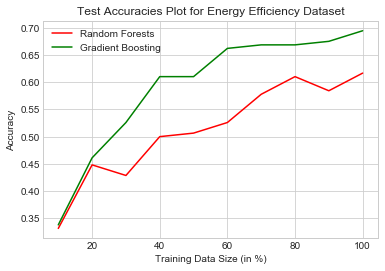

In [26]:
fig, ax = plt.subplots()

x_plots = np.arange(10, 110, 10)
y_plots = t_rf_accuracies
ax.plot(x_plots, y_plots, color='red', label='Random Forests')

x_plots = np.arange(10, 110, 10)
y_plots = t_gb_accuracies
ax.plot(x_plots, y_plots, color='green', label='Gradient Boosting')

ax.set_xlabel('Training Data Size (in %)')     
ax.set_ylabel('Accuracy')     

ax.set_title('Test Accuracies Plot for ' + d1_name + ' Dataset')
ax.legend()
ax.grid(True)

plt.show()

#### Training Times

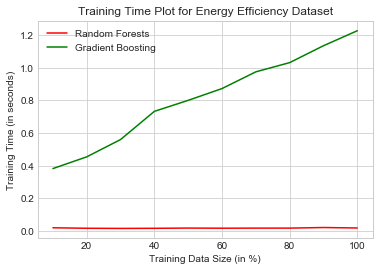

In [27]:
fig, ax = plt.subplots()

x_plots = np.arange(10, 110, 10)
y_plots = t_rf_training_times
ax.plot(x_plots, y_plots, color='red', label='Random Forests')

x_plots = np.arange(10, 110, 10)
y_plots = t_gb_training_times
ax.plot(x_plots, y_plots, color='green', label='Gradient Boosting')

ax.set_xlabel('Training Data Size (in %)')     
ax.set_ylabel('Training Time (in seconds)')     

ax.set_title('Training Time Plot for ' + d1_name + ' Dataset')
ax.legend()
ax.grid(True)

plt.show()

#### Plot Test Accuracies and Training Times for Dataset 2

#### Test Accuracies

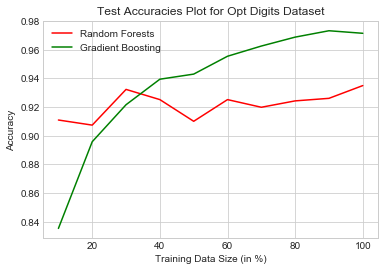

In [28]:
fig, ax = plt.subplots()

x_plots = np.arange(10, 110, 10)
y_plots = i_rf_accuracies
ax.plot(x_plots, y_plots, color='red', label='Random Forests')

x_plots = np.arange(10, 110, 10)
y_plots = i_gb_accuracies
ax.plot(x_plots, y_plots, color='green', label='Gradient Boosting')

ax.set_xlabel('Training Data Size (in %)')     
ax.set_ylabel('Accuracy')     

ax.set_title('Test Accuracies Plot for ' + d2_name + ' Dataset')
ax.legend()
ax.grid(True)

plt.show()

#### Training Times

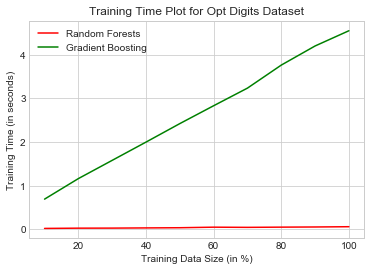

In [29]:
fig, ax = plt.subplots()

x_plots = np.arange(10, 110, 10)
y_plots = i_rf_training_times
ax.plot(x_plots, y_plots, color='red', label='Random Forests')

x_plots = np.arange(10, 110, 10)
y_plots = i_gb_training_times
ax.plot(x_plots, y_plots, color='green', label='Gradient Boosting')

ax.set_xlabel('Training Data Size (in %)')     
ax.set_ylabel('Training Time (in seconds)')     

ax.set_title('Training Time Plot for ' + d2_name + ' Dataset')
ax.legend()
ax.grid(True)

plt.show()

### Answer 3.3

For context, I'm limiting the n_estimators to 20 and max_depth to 3 for both algorithm (Random Forests and Gradient Boosting). 

There are three main observations that I find:

1. For both dataset, the training time of Random Forests is constant, it is not affected by the training data size. Meanwhile, the training time for Gradient Boosting grows linearly with the increase in training data size.

2. For dataset with many features (64 features for Opt Digits, Dataset 2), Random Forests doesn't do well, i.e. the increase in training size doesn't boost performance on test set. For dataset with small features (9 features for ), Random Forests are still quite on par with Gradient Boosting (accuracy doesn't differ significantly).

3. Gradient Boosting, while being limited to small max_depth and n_estimators, still performs well on both dataset, meaning it is robust to significant increase in features.

Thus, in general, Gradient Boosting wins performance wise, i.e. it gives better accuracy, meanwhile Random Forest wins speed wise, i.e. it has shorter training time.

## Problem 4

### Answer 4.1

Does true negative matter for both ROC and PR curve ? Argue why each point on ROC curve corresponds to a unique point on PR curve ? (5)



### Answer 4.2

#### Load Dataset

I use wdbc dataset (https://www.openml.org/d/1510)

In [31]:
d4_path = 'data/wdbc.csv'
d4_name = 'WDBC'
d4_classname = 'Class'

df4 = pd.read_csv(d4_path)
df4.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,2
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,2


#### Attribute Summary

In [32]:
get_attribute_summary(df4, d4_classname, d4_name)

Summary of WDBC dataset attributes: 
Number of features: 30
Number of instances: 569
Number of classes: 2
Number of numerical features: 30
Number of categorical features: 0


{'categorical_indexes': [],
 'num_categorical_features': 0,
 'num_classes': 2,
 'num_features': 30,
 'num_instances': 569,
 'num_numerical_features': 30}

#### Class Distribution

In [33]:
df4[d4_classname].value_counts()

1    357
2    212
Name: Class, dtype: int64

#### Preprocessing

1. Change label from {1, 2} to {1, 0}. Notice that I do this because Class 1 has more instances, so I assume it's the positive one.
2. Train Test Split

In [34]:
df4[d4_classname] = df4[d4_classname].astype('int')
df4[d4_classname] = df4[d4_classname].replace(2, 0)

X_train, X_test, y_train, y_test = train_test_split(df4.drop(columns=[d4_classname]), df4[d4_classname], test_size=0.2, random_state=28)

#### Class Distribution in Train and Test

In [40]:
print(y_train.value_counts())
print(y_test.value_counts())

1    284
0    171
Name: Class, dtype: int64
1    73
0    41
Name: Class, dtype: int64


#### Train on Both Classifiers

I limit the n_estimators to 3 for Adaboost and max_iter to 20 for Logistic Regression.

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

a_clf = AdaBoostClassifier(n_estimators=3, random_state=28)
a_clf.fit(X_train, y_train)

l_clf = LogisticRegression(max_iter=20, random_state=28)
l_clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=20,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=28, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Get Prediction and Its Probabilities (Only for Positive/Majority Class)

In [36]:
a_pred_probs = a_clf.predict_proba(X_test) #192, 2
l_pred_probs = l_clf.predict_proba(X_test) #192, 2

a_pos_probs = a_pred_probs[:, 1]
l_pos_probs = l_pred_probs[:, 1]

a_y_preds = a_clf.predict(X_test)
l_y_preds = l_clf.predict(X_test)

# An all positive classifier, always predicts 1
ap_pos_probs = [float(1.0) for _ in range(len(y_test))]
ap_y_preds = [int(1) for _ in range(len(y_test))]

#### ROC Curves

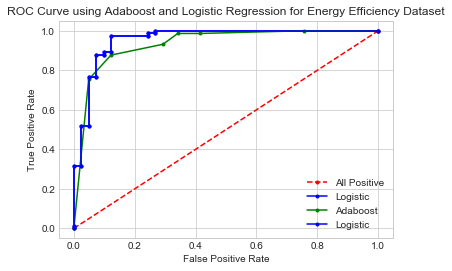

In [37]:
from sklearn.metrics import roc_curve

ap_fp_rate, ap_tp_rate, _ = roc_curve(y_test, ap_pos_probs)
a_fp_rate, a_tp_rate, _ = roc_curve(y_test, a_pos_probs)
l_fp_rate, l_tp_rate, _ = roc_curve(y_test, l_pos_probs)

fig, ax = plt.subplots()

x_plots = ap_fp_rate
y_plots = ap_tp_rate
ax.plot(x_plots, y_plots, color='red', marker='.', label='All Positive', linestyle='dashed')

x_plots = l_fp_rate
y_plots = l_tp_rate
ax.plot(x_plots, y_plots, color='blue', marker='.', label='Logistic')

x_plots = a_fp_rate
y_plots = a_tp_rate
ax.plot(x_plots, y_plots, color='green', marker='.', label='Adaboost')

x_plots = l_fp_rate
y_plots = l_tp_rate
ax.plot(x_plots, y_plots, color='blue', marker='.', label='Logistic')

ax.set_xlabel('False Positive Rate')     
ax.set_ylabel('True Positive Rate')     

ax.set_title('ROC Curve using Adaboost and Logistic Regression for ' + d1_name + ' Dataset')
ax.legend()
ax.grid(True)

#### PR Curves

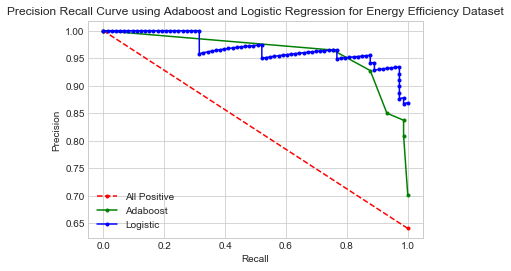

In [38]:
from sklearn.metrics import precision_recall_curve

ap_precision, ap_recall, _ = precision_recall_curve(y_test, ap_pos_probs) 
a_precision, a_recall, _ = precision_recall_curve(y_test, a_pos_probs)
l_precision, l_recall, _ = precision_recall_curve(y_test, l_pos_probs)

fig, ax = plt.subplots()

x_plots = ap_recall
y_plots = ap_precision
ax.plot(x_plots, y_plots, color='red', marker='.', label='All Positive', linestyle='dashed')

x_plots = a_recall
y_plots = a_precision
ax.plot(x_plots, y_plots, color='green', marker='.', label='Adaboost')

x_plots = l_recall
y_plots = l_precision
ax.plot(x_plots, y_plots, color='blue', marker='.', label='Logistic')

ax.set_xlabel('Recall')     
ax.set_ylabel('Precision')     

ax.set_title('Precision Recall Curve using Adaboost and Logistic Regression for ' + d1_name + ' Dataset')
ax.legend()
ax.grid(True)

### Answer 4.3

NIPS paper defined PR Gain curve. Calculate AUROC (Area under ROC), AUPR (Area under PR), and AUPRG (Area under PRG) for two classifiers and compare. Do you agree with the conclusion of NIPS paper that practitioners should use PR gain curves rather than PR curves. (10)